## Matplotlib

matplotlib是基于Python语言的开源项目，旨在为Python提供一个数据绘图包。

我将在这篇文章中介绍matplotlib API的核心对象，并介绍如何使用这些对象来实现绘图。

实际上，matplotlib的对象体系严谨而有趣，为使用者提供了巨大的发挥空间。用户在熟悉了核心对象之后，可以轻易的定制图像。

matplotlib的对象体系也是计算机图形学的一个优秀范例。即使你不是Python程序员，你也可以从文中了解一些通用的图形绘制原则。

matplotlib使用numpy进行数组运算，并调用一系列其他的Python库来实现硬件交互。matplotlib的核心是一套由对象构成的绘图API。

matplotlib项目是由John D. Hunter发起的。很不幸的是，John D. Hunter已于在2012年癌症去世，但他发为社区作出的无比贡献将永远留存。

## 理解 matplotlib 绘图原理

In [1]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [2]:
fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
line = ax.plot([0,1], [0,1])

ax.set_title("a straight line (OO)")
ax.set_xlabel("x value")
ax.set_ylabel("y value")

canvas.print_figure('demo.jpg')

上面的例子中，我们至少构建了四个对象： 

- fig

- canvas

- ax

- line

它们分别属于Figure类，FigureCanvas类，Axes类和Line2D类。

(使用obj.class__.__name 来查询对象所属的类)

我们先来看什么是Figure和Axes对象。

在matplotlib中，整个图像为一个Figure对象。

在Figure对象中可以包含一个，或者多个Axes对象。

每个Axes对象都是一个拥有自己坐标系统的绘图区域。其逻辑关系如下：

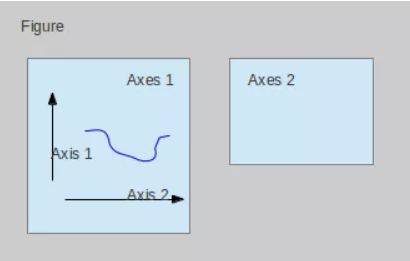

转过头来看直线图。

整个图像是fig对象。

我们的绘图中只有一个坐标系区域，也就是 -- ax。

此外还有以下对象(括号中表示对象的基本类型)：

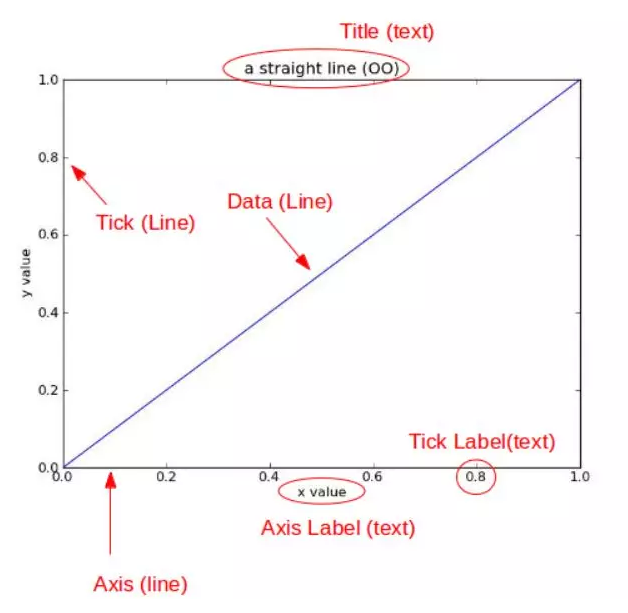

Title为标题。

Axis为坐标轴，

Label为坐标轴标注。

Tick为刻度线，

Tick Label为刻度注释。

各个对象之间有下面的对象隶属关系：(yaxis同样有tick, label和tick label，没有画出)

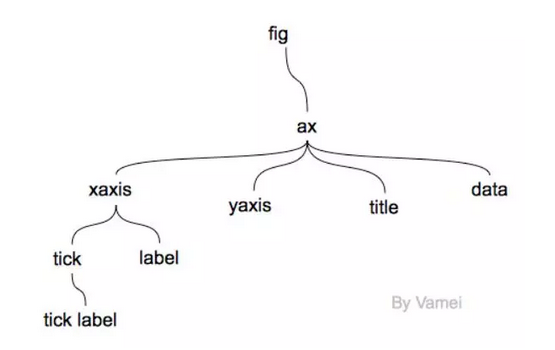

尽管data是数据绘图的关键部分，也就是数据本身的图形化显示，但是必须和xaxis, yaxis, title一起，才能真正构成一个绘图区域axes。一个单纯的，无法读出刻度的线是没有意义的。

xaxis, yaxis, title合起来构成了数据的辅助部分(data guide)。

上面元素又包含有多种图形元素。

比如说，我们的data对象是一条线(Line2D)。title, tick label和label都是文本(Text)，

而tick是由短线(Line 2D)和tick label构成，xaxis由坐标轴的线和tick以及label构成，ax由xaxis, yaxis, title, data构成，ax自身又构成了fig的一部分。

上面的每个对象，无论是Line2D, Text还是fig，它们都来自于一个叫做Artist的基类。

OO绘图的原程序还有一个canvas对象。它代表了真正进行绘图的后端(backend)。

Artist只是在程序逻辑上的绘图，它必须连接后端绘图程序才能真正在屏幕上绘制出来(或者保存为文件)。我们可以将canvas理解为绘图的物理(或者说硬件)实现。

在OO绘图程序中，我们并没有真正看到title, tick, tick label, xaxis, yaxis对象，而是使用ax.set_*的方法间接设置了这些对象。

但这些对象是真实存在的，你可以从上层对象中找到其“真身”。

比如，fig.axes[0].xaxis就是我们上面途中的xaxis对象。我们可以通过fig -> axes0 -> xaxis的顺序找到它。

因此，重复我们刚才已经说过的，一个fig就构成了一个完整的图像。对于每个Artist类的对象，都有findobj()方法，来显示该对象所包含的所有下层对象。

## 坐标

坐标是计算机绘图的基础。计算机屏幕是由一个个像素点构成的。想要在屏幕上显示图像，计算机必须告诉屏幕每个像素点上显示什么。

所以，最贴近硬件的坐标体系是以像素为单位的坐标体系。我们可以通过具体说明像素位置来标明显示器上的某一点。这叫做显示坐标(display coordinate)，以像素为单位。

然而，像素坐标不容易被纳入绘图逻辑。相同的程序，在不同的显示器上就要调整像素值，以保证图像不变形。所以一般情况下，还会有图像坐标和数据坐标。

图像坐标将一张图的左下角视为原点，将图像的x方向和y方向总长度都看做1。

x方向的0.2就是指20%的图像在x方向的总长，y方向0.8的长度指80%的y方向总长。(0.5, 0.5)是图像的中点，(1, 1)指图像的右上角。

比如下面的程序，我们在使用add_axes时，传递的参数中，前两个元素为axes的左下角在fig的图像坐标上的位置，后两个元素指axes在fig的图像坐标上x方向和y方向的长度。

fig的图像坐标称为Figure坐标，储存在为fig.transFigure

(类似的，每个axes，比如ax1，有属于自己的图像坐标。它以ax1绘图区域总长作为1，称为Axes坐标。也就是ax1.transAxes。(0.5, 0.5)就表示在Axes的中心。Axes坐标和Figure坐标原理相似，只是所用的基准区域不同。)

## 深入

在上面的例子中，无论是使用plot绘制线，还是scatter绘制散点，它们依然是比较成熟的函数。matplotlib实际上提供了更大的自由度，允许用户以更基础的方式来绘制图形，比如下面，我们绘制一个五边形。

In [3]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.path import Path
import matplotlib.patches as patches

fig= Figure()
canvas =FigureCanvas(fig)

ax1= fig.add_axes([0.1,0.1,0.8,0.8]) #left, bottom, width, height. All quantities are in fractions of figure width and height.
verts=[[0.,0.],[0.,1.],[0.5,1.5],[1.,1.],[1.,0.],[0.,0.]]
codes= [Path.MOVETO, Path.LINETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY,]
path = Path(verts,codes)

patch= patches.PathPatch(path,facecolor='yellow')
ax1.add_patch(patch)
ax1.set_xlim(-0.5,2)
ax1.set_ylim(-0.5,2)

canvas.print_figure('house.png')

在上面的程序中。我们首先确定顶点，然后构建了一个path对象，这个对象实际上就是5个顶点的连线。在codes中，我们先使用MOVETO将画笔移动到起点，然后依次用直线连接(LINETO)(我们也可以用曲线来连线，比如CURVE4，但这里没有用到)。 在path建立了封闭的5边形后，我们在path的基础上构建了patch对象，是一个图形块。patch的背景颜色选为coral。最后，我们将这个patch对象添加到预先准备好的ax上，就完成了整个绘图。

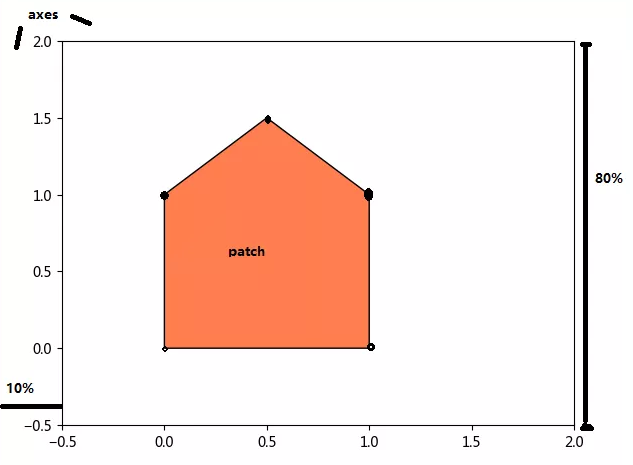

上面的过程中，我们就好像拿着一个画笔的小孩，一步步画出心目中的图画。这就是深入理解matplotlib的魅力所在——创造你自己的数据绘图函数！